
# Import Necessary Libraries




In [50]:
import pandas as pd
import numpy as np
import os
import glob
import shutil
from pandas import ExcelWriter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Load the Quarterly Data that we will want to Use for EDA and Training

In [51]:
# change the current directory to specified directory 
os.chdir(r"C:\Desired Directory\Model_V5") 
cwd = os.getcwd()
cwd

Data_folder = "./FullTrainingSet/"
file_list = os.listdir(Data_folder)
file_list

goodlist = [file for file in file_list if file.endswith(".xlsx")]
goodlist

# empy list of dataframes
df_list = []

# for every file in the cleaned flist
for file in goodlist:
    print("Reading file " + file + "....")
    # temporary d that reads every csv in this path and the file, following the column list criteria
    df_tmp = pd.read_excel(Data_folder + file)
    df_list.append(df_tmp)  # append all temporary datafames to list 

#combine all dataframes into 1 datafrmae
df = pd.concat(df_list)

Reading file Piotrosky2007_Analysis.xlsx....
Reading file Piotrosky2008Q1_Analysis.xlsx....
Reading file Piotrosky2008Q2_Analysis.xlsx....
Reading file Piotrosky2008Q3_Analysis.xlsx....
Reading file Piotrosky2008Q4_Analysis.xlsx....
Reading file Piotrosky2009Q1_Analysis.xlsx....
Reading file Piotrosky2009Q2_Analysis.xlsx....
Reading file Piotrosky2009Q3_Analysis.xlsx....
Reading file Piotrosky2009Q4_Analysis.xlsx....
Reading file Piotrosky2010Q1_Analysis.xlsx....
Reading file Piotrosky2010Q2_Analysis.xlsx....
Reading file Piotrosky2010Q3_Analysis.xlsx....
Reading file Piotrosky2010Q4_Analysis.xlsx....


In [52]:
# Get rid of NA's we want complete rows of data

df = df[df['OneYearReturn'].notna()]
df = df[df['Fscore'].notna()]
df = df[df['BM'].notna()]
df.head()

,Quarter Date,Security,Name,Sector,ROA,CFO,ROA_Change,Accrual,LT_Debt_To_Asset_change,Current_Ratio_Change,...,Asset_Turnover_Change,Fscore,BOOK_VAL_PER_SH,ClosingPrice,BM,StartingPrice,OneYearPrice,TwoYearPrice,OneYearReturn,TwoYearReturn
0,2007-12-31,0111145D UN Equity,Nicor Inc,Utilities,1.0,1.0,1.0,1.0,0.0,1.0,...,0.0,6.0,20.139780,42.35,0.475556,42.32,34.96,40.66,-0.173913,-0.039225
2,2007-12-31,0167866D UN Equity,Petrohawk Energy Corp,Energy,1.0,1.0,0.0,1.0,1.0,0.0,...,1.0,5.0,11.743936,17.31,0.678448,15.97,19.73,23.58,0.235441,0.476518
3,2007-12-31,0202445Q UN Equity,EMD Millipore Corp,"Consumer, Non-cyclical",1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,5.0,19.866647,73.18,0.271476,66.08,55.43,70.03,-0.161168,0.059776
4,2007-12-31,0203524D UN Equity,National Semiconductor Corp,Technology,1.0,1.0,0.0,1.0,1.0,1.0,...,0.0,7.0,1.071070,22.64,0.047309,19.02,10.26,13.68,-0.460568,-0.280757
6,2007-12-31,0226226D UN Equity,Centex LLC,"Consumer, Cyclical",0.0,1.0,0.0,1.0,1.0,1.0,...,1.0,5.0,34.261831,25.26,1.356367,26.67,8.32,NaN,-0.688039,NaN


In [53]:
# Parse dataframe into respective quarters so we can label the outperformers from the underperformers of each quarter

df2007Q4 = df.loc[df['Quarter Date'] == '2007-12-31']
df2008Q1 = df.loc[df['Quarter Date'] == '2008-03-31']
df2008Q2 = df.loc[df['Quarter Date'] == '2008-06-30']
df2008Q3 = df.loc[df['Quarter Date'] == '2008-09-30']
df2008Q4 = df.loc[df['Quarter Date'] == '2008-12-31']
df2009Q1 = df.loc[df['Quarter Date'] == '2009-03-31']
df2009Q2 = df.loc[df['Quarter Date'] == '2009-06-30']
df2009Q3 = df.loc[df['Quarter Date'] == '2009-09-30']
df2009Q4 = df.loc[df['Quarter Date'] == '2009-12-31']
df2010Q1 = df.loc[df['Quarter Date'] == '2010-03-31']
df2010Q2 = df.loc[df['Quarter Date'] == '2010-06-30']
df2010Q3 = df.loc[df['Quarter Date'] == '2010-09-30']
df2010Q4 = df.loc[df['Quarter Date'] == '2010-12-31']


# Find Median 1 year returns for all Russell 3000 Index. For those that beat the median these are labeled as outperform. Vice versa, label those as underperform

In [54]:
df2007Q4.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.637625
0.50   -0.436081
0.75   -0.238650
Name: OneYearReturn, dtype: float64

In [55]:
def ReturnTarget(row):
    if row['OneYearReturn'] > -0.436081:
        val = 1
    else:
        val = 0
    return val

def OutPerform(row):
    if row['OneYearReturn'] > -0.436081:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < -0.436081:
        val = 1
    else:
        val = 0
    return val

df2007Q4['Outperform'] = df2007Q4.apply(OutPerform, axis=1)
df2007Q4['Underperform'] = df2007Q4.apply(UnderPerform, axis=1)

In [56]:
df2008Q1.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.537417
0.50   -0.376123
0.75   -0.205717
Name: OneYearReturn, dtype: float64

In [57]:
def OutPerform(row):
    if row['OneYearReturn'] > -0.376123:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < -0.376123:
        val = 1
    else:
        val = 0
    return val

df2008Q1['Outperform'] = df2008Q1.apply(OutPerform, axis=1)
df2008Q1['Underperform'] = df2008Q1.apply(UnderPerform, axis=1)

In [58]:
df2008Q2.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.403677
0.50   -0.203261
0.75   -0.007560
Name: OneYearReturn, dtype: float64

In [59]:
def OutPerform(row):
    if row['OneYearReturn'] > -0.203261:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < -0.203261:
        val = 1
    else:
        val = 0
    return val

df2008Q2['Outperform'] = df2008Q2.apply(OutPerform, axis=1)
df2008Q2['Underperform'] = df2008Q2.apply(UnderPerform, axis=1)

In [60]:
df2008Q3.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.083959
0.50    0.121406
0.75    0.409106
Name: OneYearReturn, dtype: float64

In [61]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.121406:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.121406:
        val = 1
    else:
        val = 0
    return val

df2008Q3['Outperform'] = df2008Q3.apply(OutPerform, axis=1)
df2008Q3['Underperform'] = df2008Q3.apply(UnderPerform, axis=1)

In [62]:
df2008Q4.OneYearReturn.quantile([0.25,0.5,0.75])

0.25    0.126023
0.50    0.430215
0.75    0.930950
Name: OneYearReturn, dtype: float64

In [63]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.430215:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.430215:
        val = 1
    else:
        val = 0
    return val


df2008Q4['Outperform'] = df2008Q4.apply(OutPerform, axis=1)
df2008Q4['Underperform'] = df2008Q4.apply(UnderPerform, axis=1)

In [64]:
df2009Q1.OneYearReturn.quantile([0.25,0.5,0.75])

0.25    0.215399
0.50    0.455082
0.75    0.817514
Name: OneYearReturn, dtype: float64

In [65]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.455082:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.455082:
        val = 1
    else:
        val = 0
    return val


df2009Q1['Outperform'] = df2009Q1.apply(OutPerform, axis=1)
df2009Q1['Underperform'] = df2009Q1.apply(UnderPerform, axis=1)

In [66]:
df2009Q2.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.047968
0.50    0.157341
0.75    0.405056
Name: OneYearReturn, dtype: float64

In [67]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.157341:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.157341:
        val = 1
    else:
        val = 0
    return val


df2009Q2['Outperform'] = df2009Q2.apply(OutPerform, axis=1)
df2009Q2['Underperform'] = df2009Q2.apply(UnderPerform, axis=1)

In [68]:

df2009Q3.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.057841
0.50    0.137784
0.75    0.360810
Name: OneYearReturn, dtype: float64

In [69]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.137784:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.137784:
        val = 1
    else:
        val = 0
    return val


df2009Q3['Outperform'] = df2009Q3.apply(OutPerform, axis=1)
df2009Q3['Underperform'] = df2009Q3.apply(UnderPerform, axis=1)


In [70]:
df2009Q4.OneYearReturn.quantile([0.25,0.5,0.75])

0.25    0.067786
0.50    0.266372
0.75    0.523461
Name: OneYearReturn, dtype: float64

In [71]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.266372:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.266372:
        val = 1
    else:
        val = 0
    return val


df2009Q4['Outperform'] = df2009Q4.apply(OutPerform, axis=1)
df2009Q4['Underperform'] = df2009Q4.apply(UnderPerform, axis=1)

In [72]:
df2010Q1.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.047850
0.50    0.150119
0.75    0.371770
Name: OneYearReturn, dtype: float64

In [73]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.150119:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.150119:
        val = 1
    else:
        val = 0
    return val


df2010Q1['Outperform'] = df2010Q1.apply(OutPerform, axis=1)
df2010Q1['Underperform'] = df2010Q1.apply(UnderPerform, axis=1)

In [74]:
df2010Q2.OneYearReturn.quantile([0.25,0.5,0.75])

0.25    0.126090
0.50    0.361853
0.75    0.638839
Name: OneYearReturn, dtype: float64

In [75]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.361853:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.361853:
        val = 1
    else:
        val = 0
    return val


df2010Q2['Outperform'] = df2010Q2.apply(OutPerform, axis=1)
df2010Q2['Underperform'] = df2010Q2.apply(UnderPerform, axis=1)

In [76]:
df2010Q3.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.172122
0.50    0.013396
0.75    0.198962
Name: OneYearReturn, dtype: float64

In [77]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.013396:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.013396:
        val = 1
    else:
        val = 0
    return val

df2010Q3['Outperform'] = df2010Q3.apply(OutPerform, axis=1)
df2010Q3['Underperform'] = df2010Q3.apply(UnderPerform, axis=1)

In [78]:
df2010Q4.OneYearReturn.quantile([0.25,0.5,0.75])

0.25   -0.194168
0.50    0.004613
0.75    0.169393
Name: OneYearReturn, dtype: float64

In [79]:
def OutPerform(row):
    if row['OneYearReturn'] > 0.004613:
        val = 1
    else:
        val = 0
    return val

def UnderPerform(row):
    if row['OneYearReturn'] < 0.004613:
        val = 1
    else:
        val = 0
    return val

df2010Q4['Outperform'] = df2010Q4.apply(OutPerform, axis=1)
df2010Q4['Underperform'] = df2010Q4.apply(UnderPerform, axis=1)

# Append all quarterly dataframes back into one dataframe

In [80]:
DF_GreatRecession = df2007Q4.append(df2008Q1)
DF_GreatRecession = DF_GreatRecession.append(df2008Q2)
DF_GreatRecession = DF_GreatRecession.append(df2008Q3)
DF_GreatRecession = DF_GreatRecession.append(df2008Q4)
DF_GreatRecession = DF_GreatRecession.append(df2009Q1)
DF_GreatRecession = DF_GreatRecession.append(df2009Q2)

DF_PostRecession = df2009Q3.append(df2009Q4)
DF_PostRecession = DF_PostRecession.append(df2010Q1)
DF_PostRecession = DF_PostRecession.append(df2010Q2)
DF_PostRecession = DF_PostRecession.append(df2010Q3)
DF_PostRecession = DF_PostRecession.append(df2010Q4)


DF = DF_GreatRecession.append(DF_PostRecession)


In [81]:
DF_GreatRecession

,Quarter Date,Security,Name,Sector,ROA,CFO,ROA_Change,Accrual,LT_Debt_To_Asset_change,Current_Ratio_Change,...,BOOK_VAL_PER_SH,ClosingPrice,BM,StartingPrice,OneYearPrice,TwoYearPrice,OneYearReturn,TwoYearReturn,Outperform,Underperform
0,2007-12-31,0111145D UN Equity,Nicor Inc,Utilities,1.0,1.0,1.0,1.0,0.0,1.0,...,20.139780,42.35,0.475556,42.32,34.96,40.66,-0.173913,-0.039225,1,0
2,2007-12-31,0167866D UN Equity,Petrohawk Energy Corp,Energy,1.0,1.0,0.0,1.0,1.0,0.0,...,11.743936,17.31,0.678448,15.97,19.73,23.58,0.235441,0.476518,1,0
3,2007-12-31,0202445Q UN Equity,EMD Millipore Corp,"Consumer, Non-cyclical",1.0,1.0,0.0,1.0,1.0,1.0,...,19.866647,73.18,0.271476,66.08,55.43,70.03,-0.161168,0.059776,1,0
4,2007-12-31,0203524D UN Equity,National Semiconductor Corp,Technology,1.0,1.0,0.0,1.0,1.0,1.0,...,1.071070,22.64,0.047309,19.02,10.26,13.68,-0.460568,-0.280757,0,1
6,2007-12-31,0226226D UN Equity,Centex LLC,"Consumer, Cyclical",0.0,1.0,0.0,1.0,1.0,1.0,...,34.261831,25.26,1.356367,26.67,8.32,NaN,-0.688039,NaN,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2009-06-30,ZOLT UW Equity,Zoltek Cos Inc,Basic Materials,1.0,1.0,0.0,1.0,0.0,1.0,...,8.420147,9.72,0.866270,9.83,8.71,10.70,-0.113937,0.088505,0,1
2915,2009-06-30,ZQKSQ UN Equity,Boardriders Inc,"Consumer, Cyclical",0.0,0.0,1.0,1.0,1.0,0.0,...,3.017776,1.85,1.631230,1.97,4.11,4.87,1.086294,1.472081,1,0
2916,2009-06-30,ZRAN UW Equity,Zoran Corp,Technology,0.0,1.0,0.0,1.0,0.0,1.0,...,9.008825,10.90,0.826498,11.42,9.31,8.56,-0.184764,-0.250438,0,1
2917,2009-06-30,ZUMZ UW Equity,Zumiez Inc,"Consumer, Cyclical",1.0,1.0,0.0,1.0,0.0,1.0,...,5.893035,8.01,0.735710,8.37,16.43,25.73,0.962963,2.074074,1,0


In [82]:
# Investigate that all data was loaded
DF[-10:]

,Quarter Date,Security,Name,Sector,ROA,CFO,ROA_Change,Accrual,LT_Debt_To_Asset_change,Current_Ratio_Change,...,BOOK_VAL_PER_SH,ClosingPrice,BM,StartingPrice,OneYearPrice,TwoYearPrice,OneYearReturn,TwoYearReturn,Outperform,Underperform
2933,2010-12-31,ZBRA UW Equity,Zebra Technologies Corp,Technology,1.0,1.0,1.0,1.0,0.0,0.0,...,12.928368,37.99,0.340310,40.00,39.865,43.65,-0.003375,0.091250,0,1
2934,2010-12-31,ZEP UN Equity,Zep Inc,Basic Materials,1.0,1.0,1.0,1.0,1.0,0.0,...,5.726165,19.88,0.288036,18.42,16.760,14.80,-0.090119,-0.196526,0,1
2935,2010-12-31,ZEUS UW Equity,Olympic Steel Inc,Industrial,1.0,0.0,1.0,0.0,1.0,0.0,...,24.160614,28.68,0.842420,27.93,26.580,21.21,-0.048335,-0.240602,0,1
2936,2010-12-31,ZIGO UW Equity,Zygo Corp,Industrial,1.0,1.0,1.0,1.0,0.0,1.0,...,5.858562,12.23,0.479032,11.40,18.240,16.28,0.600000,0.428070,1,0
2937,2010-12-31,ZINCQ UW Equity,American Zinc Recycling LLC,Basic Materials,1.0,1.0,1.0,1.0,0.0,0.0,...,8.135893,13.04,0.623918,13.14,11.370,10.45,-0.134703,-0.204718,0,1
2940,2010-12-31,ZIXI UQ Equity,Zix Corp,Communications,1.0,1.0,1.0,1.0,0.0,1.0,...,0.070841,4.27,0.016590,4.62,3.180,3.36,-0.311688,-0.272727,0,1
2941,2010-12-31,ZOLL UW Equity,Zoll Medical Corp,"Consumer, Non-cyclical",1.0,1.0,1.0,1.0,0.0,0.0,...,14.582310,37.23,0.391682,42.42,69.790,NaN,0.645215,NaN,1,0
2942,2010-12-31,ZOLT UW Equity,Zoltek Cos Inc,Basic Materials,0.0,1.0,0.0,1.0,0.0,1.0,...,8.511275,11.55,0.736907,11.63,8.840,7.47,-0.239897,-0.357696,0,1
2945,2010-12-31,ZUMZ UW Equity,Zumiez Inc,"Consumer, Cyclical",1.0,1.0,1.0,1.0,0.0,0.0,...,6.798852,26.87,0.253028,24.25,29.370,21.11,0.211134,-0.129485,1,0
2947,2010-12-31,ZZ UN Equity,Sealy Corp,"Consumer, Cyclical",0.0,1.0,1.0,1.0,1.0,1.0,...,-0.979010,2.92,-0.335278,2.69,1.450,2.18,-0.460967,-0.189591,0,1


# Turn Quarterly Data into pivot tables for analysis

## Piotrosky Screener Performance during the 2008 Great Recession

In [83]:
pivoted_Recession = pd.pivot_table(DF_GreatRecession, index = 'Fscore', values = ['Underperform', 'Outperform' ], aggfunc='sum')
pivoted_Recession = pd.DataFrame(pivoted_Recession.to_records())

In [84]:
table_Recession = pivoted_Recession
table_Recession['% Outperformed'] = (table_Recession.Outperform / (table_Recession.Outperform + table_Recession.Underperform)).round(2)
table_Recession['% Underperformed'] = (table_Recession.Underperform / (table_Recession.Outperform + table_Recession.Underperform)).round(2)
print(table_Recession)

   Fscore  Outperform  Underperform  % Outperformed  % Underperformed
0     0.0           3             3            0.50              0.50
1     1.0          44            53            0.45              0.55
2     2.0         190           192            0.50              0.50
3     3.0         539           542            0.50              0.50
4     4.0        1201          1229            0.49              0.51
5     5.0        1506          1453            0.51              0.49
6     6.0        1441          1424            0.50              0.50
7     7.0         850           874            0.49              0.51
8     8.0         284           313            0.48              0.52
9     9.0          79            55            0.59              0.41


Companies with a Piotrosky F-score of 9 during a recession, outperformed 59% of the time (1 year return).

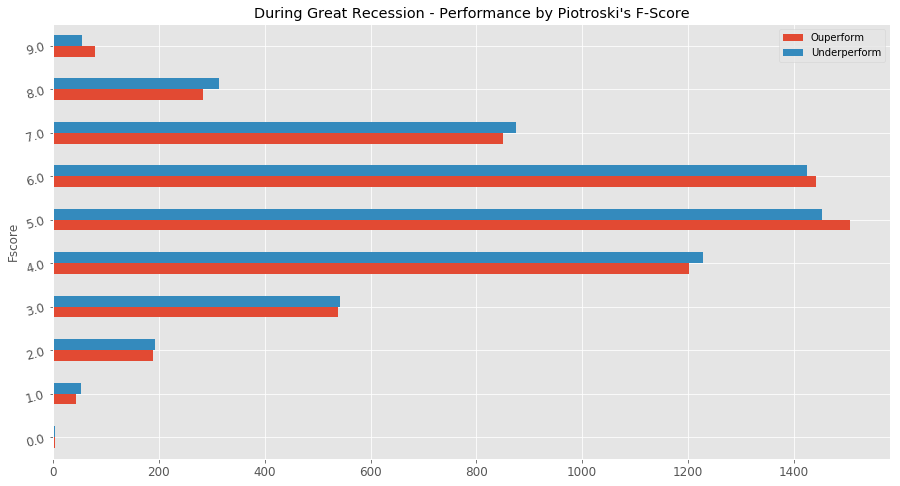

In [85]:
data = {"Ouperform":pivoted_Recession['Outperform'],

        "Underperform":pivoted_Recession['Underperform']

        };

index     = pivoted_Recession['Fscore'];




# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart

dataFrame.plot.barh(rot=15,figsize=(15,8), fontsize=12, title="During Great Recession - Performance by Piotroski's F-Score");

plt.show(block=True);

## In comparison to Piotrosky Screener Performance After the 2008 Great Recession

In [86]:
pivoted_PostRecession = pd.pivot_table(DF_PostRecession, index = 'Fscore', values = ['Underperform', 'Outperform' ], aggfunc='sum')
pivoted_PostRecession = pd.DataFrame(pivoted_PostRecession.to_records())

In [87]:
table_PostRecession = pivoted_PostRecession
table_PostRecession['% Outperformed'] = (table_PostRecession.Outperform / (table_PostRecession.Outperform + table_PostRecession.Underperform)).round(2)
table_PostRecession['% Underperformed'] = (table_PostRecession.Underperform / (table_PostRecession.Outperform + table_PostRecession.Underperform)).round(2)
print(table_PostRecession)

   Fscore  Outperform  Underperform  % Outperformed  % Underperformed
0     0.0           5             6            0.45              0.55
1     1.0          31            49            0.39              0.61
2     2.0         194           266            0.42              0.58
3     3.0         607           620            0.49              0.51
4     4.0        1326          1303            0.50              0.50
5     5.0        1518          1498            0.50              0.50
6     6.0        1081           988            0.52              0.48
7     7.0         612           688            0.47              0.53
8     8.0         211           183            0.54              0.46
9     9.0          36            18            0.67              0.33


Companies with a Piotrosky F-score of 9 not during a recession, outperformed 67% of the time (1 year return).

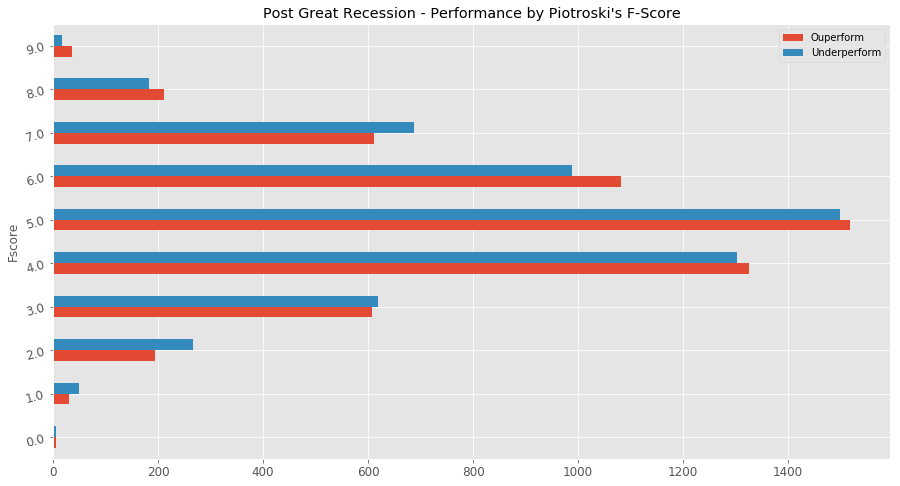

In [88]:
data = {"Ouperform":pivoted_PostRecession['Outperform'],

        "Underperform":pivoted_PostRecession['Underperform']

        };

index     = pivoted_PostRecession['Fscore'];




# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart

dataFrame.plot.barh(rot=15,figsize=(15,8), fontsize=12, title="Post Great Recession - Performance by Piotroski's F-Score");

plt.show(block=True);

## Piotrosky Screener Performance, During and After a Recession (2007Q4 - 2010Q10)

In [89]:
pivoted = pd.pivot_table(DF, index = 'Fscore', values = ['Underperform', 'Outperform' ], aggfunc='sum')
pivoted = pd.DataFrame(pivoted.to_records())

In [90]:
table = pivoted
table['% Outperformed'] = (table.Outperform / (table.Outperform + table.Underperform)).round(2)
table['% Underperformed'] = (table.Underperform / (table.Outperform + table.Underperform)).round(2)
print(table)

   Fscore  Outperform  Underperform  % Outperformed  % Underperformed
0     0.0           8             9            0.47              0.53
1     1.0          75           102            0.42              0.58
2     2.0         384           458            0.46              0.54
3     3.0        1146          1162            0.50              0.50
4     4.0        2527          2532            0.50              0.50
5     5.0        3024          2951            0.51              0.49
6     6.0        2522          2412            0.51              0.49
7     7.0        1462          1562            0.48              0.52
8     8.0         495           496            0.50              0.50
9     9.0         115            73            0.61              0.39


Companies with a Piotrosky F-score of 9 through all quarters of the training dataset, outperformed 61% of the time (1 year return).

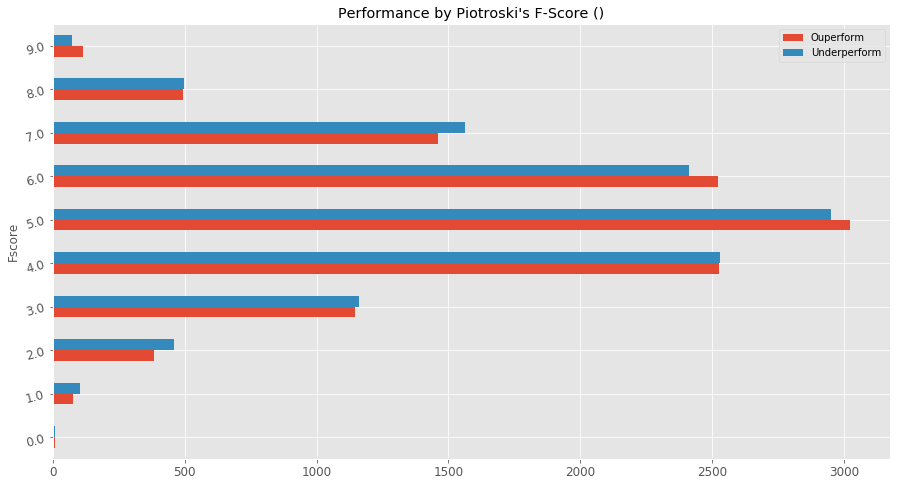

In [91]:
data = {"Ouperform":pivoted['Outperform'],

        "Underperform":pivoted['Underperform']

        };

index     = pivoted['Fscore'];




# Dictionary loaded into a DataFrame       

dataFrame = pd.DataFrame(data=data, index=index);

# Draw a vertical bar chart

dataFrame.plot.barh(rot=15,figsize=(15,8), fontsize=12, title="Performance by Piotroski's F-Score ()");

plt.show(block=True);

In [92]:
os.chdir(r"C:\Desired Saved Directory\Model_V5\FullTrainingSet\ClassifierReady") 
cwd = os.getcwd()
cwd

'C:\\Desired Saved Directory\\ClassifierReady'

In [93]:
writer1 = ExcelWriter('PiotroskyTraining_ClassifierReady.xlsx')
DF.to_excel(writer1,'Sheet1')
writer1.save()